# 线性回归

&emsp;&emsp;  许多工程问题，常常需要根据**两个变量的几组实验数值**——实验数据，来找出这**两个变量间的函数关系**的近似表达式。通常把这样得到的函数的近似表达式叫做**经验公式**。

&emsp;&emsp; 经验公式建立以后，就可以把生产或实验中所积累的某些经验，提高到理论上加以分析。下面通过举例介绍常用的一种建立经验公式的方法。

## 最小二乘法

&emsp;&emsp;**例**   
&emsp;&emsp; 为了测定刀具的磨损速度，我们做这样的实验：经过一定时间(如每隔一小时)，测量一次刀具的厚度，得到一组实验数据如下：

| 顺序编号 $i$       | 0    | 1    | 2    | 3    | 4    | 5    | 6    | 7    |
| ---------------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| 时间 $x_i/h$       |  0   | 1    | 2    | 3    | 4    | 5    | 6    | 7    |
| 刀具厚度 $y_i/mm$  | 27   | 26.8 | 26.5 | 26.3 | 26.1 | 25.7 | 25.3 | 24.8 |

## 数据可视化

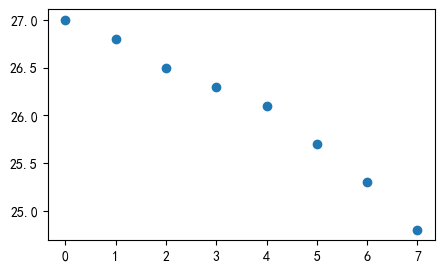

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
x = np.arange(0,8)
y = [ 27, 26.8, 26.5, 26.3, 26.1, 25.7, 25.3, 24.8 ]
ax.scatter(x,y)

&emsp;&emsp;试根据上面的实验数据建立 $y$ 和 $x$ 之间的经验公式 $y=f(x)$ ．  
&emsp;&emsp;也就是，要找出个能使上述数据大体适合的函数关系 $y=f(x)$ .    

&emsp;&emsp;**解** 首先，要确定 $f(x)$ 的类型．为此，可按下法处理．在直角坐标系上取 $x$ 为横坐标， $y$ 为纵坐标，描出上述各对数据的对应点，如下图所示．

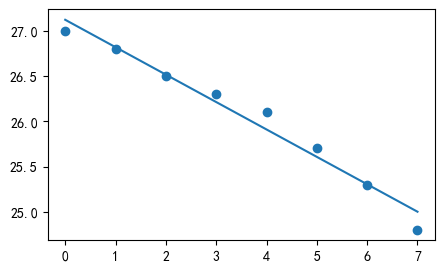

In [10]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
x = np.arange(0,8)
y = [ 27, 26.8, 26.5, 26.3, 26.1, 25.7, 25.3, 24.8 ]
plt.scatter(x,y)
y_hat = -0.30357143 * x + 27.125
plt.plot(x, y_hat)

&emsp;&emsp; 从图上可以看出，这些点的连线大致接近于一条直线．于是，就可以认为 $y=f(x)$ 是线性函数，并设

$$f(x)=ax+b$$ ,
其中 $a$ 和 $b$ 是待定常数． 

&emsp;&emsp;常数 $a$ 和 $b$ 如何确定呢？最理想的情形是选取这样的 $a$ 和 $b$ ，能使直线 $y=ax+b$  经过图中所标出的各点．

&emsp;&emsp;但在实际上这是不可能的．因为这些点本来就不在同一条直线上． 

&emsp;&emsp;因此，只能要求选取这样的 $a、b$ ，使得 $f(x)=ax+b$ 在 $x_0,x_1,x_2, … ,x_7$ 处的函数值与实验数据 $y_0,y_1,y_2,…,y_7$ 相差都很小.   

&emsp;&emsp;就是要使偏差
$$
y_i-f(x_i)  \quad (i=0,1,2,…,7)
$$
都很小．

那么如何达到这一要求呢？  

能否设法使偏差的和
$$
\sum_{i=0}^{7} [y_i-f(x_i)]
$$
很小来保证每个偏差都很小呢？

不能，因为偏差有正有负，在求和时，可能互相抵消．

为了避免这种情形，可对偏差取绝对值再求和，只要
$$
\sum_{i=0}^{7} |y-f(x)| =\sum_{i=0}^{7} |y_i-(ax_i+b)|
$$
很小，就可以保证每个偏差的绝对值都很小．

但是这个式子中有绝对值记号，不便于进一步分析讨论．

由于任何实数的平方都是正数或零，因此可以考虑使
$$
M = \sum_{i=0}^{7}[y_i-(ax_i+b)]^2
$$
最小来保证每个偏差的绝对值都很小．

&emsp;&emsp;这种**根据偏差的平方和为最小的条件选择常数 $a$ 与 $b$ 的方法**叫做**最小二乘法**．这种确定常数 $a$ 与 $b$ 的方法是通常所采用的． 

&emsp;&emsp;现在我们来研究，经验公式 $y=ax+b$ 中， $a$ 和 $b$ 符合什么条件时，可以使上述的 $M$ 为最小．  

&emsp;&emsp;如果把 $M$ 看成与自变量 $a$ 和 $b$ 相对应的因变量，那么问题就可归结为求函数 $M=M(a,b)$ 在哪些点处取得最小值．

&emsp;&emsp;由(多元函数的极值)可知，上述问题可以通过求方程组  
$$  
\left \{  
\begin{array}{l}  
M_a(a,b)=0, \\
M_b(a,b)=0
\end{array}  
\right.  
$$  
的解来解决。

对 $M$ 的自变量 $a$ 和 $b$ 求偏导：
$$
M = \sum_{i=0}^{7}[y_i-(ax_i+b)]^2
$$

即令
$$  
\left\{  
\begin{array}{l}  
\frac{\partial{M}}{\partial{a}} = 2\sum_{i=0}^{7} [y_i-(ax_i+b)] (-x_i) = -2\sum_{i=0}^{7} [y_i-(ax_i+b)]x_i \\
\frac{\partial{M}}{\partial{b}} = 2\sum_{i=0}^{7} [y_i-(ax_i+b)] (-1) = -2\sum_{i=0}^{7} [y_i-(ax_i+b)]
\end{array}  
\right.  
$$  

亦即
$$  
\left\{  
\begin{array}{l}  
\sum_{i=0}^{7} x_i [y_i-(ax_i+b)] = 0 \\
\sum_{i=0}^{7} [y_i-(ax_i+b)] = 0 
\end{array}  
\right.  
$$

将括号内各项进行整理合并，并把未知数 $a$ 和 $b$ 分离出来，便得

$$  
\left\{  
\begin{aligned} 
\sum_{i=0}^{7} [x_i y_i - ax_i^2-bx_i] & = \sum_{i=0}^{7} x_i y_i - a \sum_{i=0}^{7} x_i^2- b \sum_{i=0}^{7} x_i &=0   \\
\sum_{i=0}^{7} [y_i-ax_i-b] & = \sum_{i=0}^{7} y_i - a\sum_{i=0}^{7}x_i  - \sum_{i=0}^{7} b & =0
\end{aligned}  
\right.  
$$

即：
$$  
\left\{  
\begin{aligned} 
a \sum_{i=0}^{7} x_i^2 + b \sum_{i=0}^{7} x_i  =  \sum_{i=0}^{7} y_i x_i \\
a\sum_{i=0}^{7}x_i + 8b  = \sum_{i=0}^{7}y_i  
\end{aligned}  
\right.  
$$

下面通过列表来计算 $\sum_{i=0}^{7}x_i, \sum_{i=0}^{7} x_i^2, \sum_{i=0}^{7} y_i 及 \sum_{i=0}^{7}y_i x_i$  

|      | 顺序编号 $i$ | 时间 $x_i$ /h | $x_i^2$  | 刀具厚度 $y_i$ /mm    | $y_i x_i$  |
| ---- | --------- | -------- | ---- | ----- | ----- |
|      | 0         | 0        | 0    | 27    | 0     |
|      | 1         | 1        | 1    | 26.8  | 26.8  |
|      | 2         | 2        | 4    | 26.5  | 53    |
|      | 3         | 3        | 9    | 26.3  | 78.9  |
|      | 4         | 4        | 16   | 26.1  | 104.4 |
|      | 5         | 5        | 25   | 25.7  | 128.5 |
|      | 6         | 6        | 36   | 25.3  | 151.8 |
|      | 7         | 7        | 49   | 24.8  | 173.6 |
| $\sum$ | 28        | 28       | 140  | 208.5 | 717   |

代人方程组，得到
$$
140a +28b =717, \\  
28a +8b =208.5.
$$
解此方程组，得到 $a=-0.3036, b=27.125$ ，这样便得到所求经验公式为  
$$
y=f(x)=-0.3036x+27.125
$$

> 高等数学 第七版 下册 第九章 多元函数微分法及应用 第十节 最小二乘法

对于
$$
y = ax+b
$$
我们将直线方程修改为
$$
y=ax_0+bx_1
$$

其中： $x_1 = 1$  

转换为矩阵形式为：
$$
y = 
\begin{bmatrix}
x_0 & x_1
\end{bmatrix}
\begin{bmatrix}
a \\ b
\end{bmatrix}
$$
我们通过类似的方式，来表示多元线性回归。

## 最小二乘法（矩阵表示）

设：样本 $X$ 容量为 $n$ , 特征个数 $m$ , 权重为 $W$ , 真实值为 $y$ ， 预测值为 $\hat{y}$ 

真实值与预测值之间的误差为：

$$
Y - \hat{Y} =
\begin{bmatrix}  
y_{1} \\  
y_{2} \\  
\vdots\\  
y_{n} \\  
\end{bmatrix} 
-
\begin{bmatrix}  
\hat{y}_{1} \\  
\hat{y}_{2} \\  
\vdots\\  
\hat{y}_{n} \\  
\end{bmatrix}  
$$

$$
\quad \quad 
Y-\hat{Y} 
=
\begin{bmatrix}  
y_{1} \\  
y_{2} \\  
\vdots\\  
y_{n} \\  
\end{bmatrix}  
- 
\begin{bmatrix}  
x_{11} & x_{12} & \cdots & x_{1m} \\  
x_{21} & x_{22} & \cdots & x_{2m} \\  
\vdots & \vdots & \ddots & \vdots \\  
x_{n1} & x_{n2} & \cdots & x_{nm} \\  
\end{bmatrix}  
\begin{bmatrix}  
w_{1} \\  
w_{2} \\  
\vdots\\  
w_{m} \\  
\end{bmatrix}  
= 
\begin{bmatrix}  
e_{1} \\  
e_{2} \\  
\vdots\\  
e_{n} \\  
\end{bmatrix}  
$$

$$
M = 
\begin{bmatrix} e_1 & e_2  & \cdots & e_n \end{bmatrix}
\begin{bmatrix}  
e_{1} \\  
e_{2} \\  
\vdots\\  
e_{n} \\  
\end{bmatrix}  
= (Y-XW)^T (Y-XW)
$$

$$
\begin{aligned}
M(\omega) & = (Y-XW)^T (Y-XW) \\
& = [Y^T-(XW)^T](Y-XW) \\
& = (Y^T - W^TX^T)(Y-XW) \\
& = Y^TY - Y^TXW - W^TX^TY+W^TX^TXW
\end{aligned}
$$

其中，
$$ 
\begin{aligned}
W^TX^TY  = (XW)^TY  = [Y^TXW ]^T
\end{aligned}
$$

 $[Y^TXW ]^T$ 是一个一阶方阵，也就是一个数。
因此：
$$
M(W) = Y^TY-2Y^TXW+W^TX^TXW
$$


那么如何对 $\frac{\partial{M}}{\partial{W}}$ 矩阵求导呢？

> 矩阵求导知识参考"高等数学-矩阵求导"一文  
> 矩阵求导笔记来源  
> https://www.bilibili.com/video/BV1av4y1b7MM/?spm_id_from=333.337.search-card.all.click&vd_source=a49b93ba136258ad33823854fe51db86

# 线性回归

## 最小二乘法（矩阵求导）

$$
\begin{aligned}
M(\omega) & = Y^TY-2Y^TXW+W^TX^TXW    \\
\frac{\partial{M}}{\partial{w}}  &= 0 - (2Y^TX)^T + 2X^TXW = 0 \\
 - X^TY + X^TXW &=0 \\
  X^TXW & = X^TY \\
 W & = (X^TX)^{-1} X^TY
\end{aligned}
$$

其中： 
$X^TX$ 为对称阵

> 需要注意的是，使用求导方式计算参数值的前提条件是 $X^TX$ 是可逆的。

## Numpy求解

In [11]:
import numpy as np

x_1 = np.arange(0,8)
x_0 = np.ones(8)
X = np.vstack((x_0,x_1)).T

y = [ 27, 26.8, 26.5, 26.3, 26.1, 25.7, 25.3, 24.8 ]
X

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.]])

In [12]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([27.125     , -0.30357143])

# Scikit Learn

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = range(0,8)
y = [ 27, 26.8, 26.5, 26.3, 26.1, 25.7, 25.3, 24.8 ]

x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
lr = LinearRegression().fit(x, y)
print(lr.coef_, lr.intercept_)

[[-0.30357143]] [27.125]


## 结果可视化

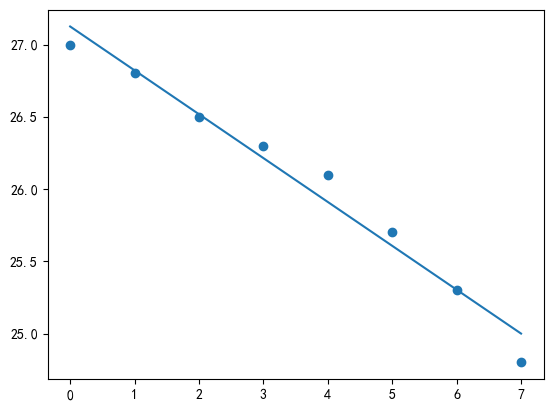

In [14]:
plt.scatter(x,y)
y_hat = lr.coef_[0] * x + lr.intercept_
plt.plot(x, y_hat)

# 损失函数可视化

In [15]:
a = lr.coef_[0][0]
b = lr.intercept_[0]

In [16]:
a

-0.3035714285714286

In [17]:
b

27.125

## 构造以 $a,b,m$ 为轴的三维坐标系

In [18]:
import numpy as np
a_data = np.linspace(a-10, a+10, 100)
b_data = np.linspace(b-100, b+100, 100)
a_grid,b_grid = np.meshgrid(a_data,b_data)
a_grid

array([[-10.30357143, -10.10155123,  -9.89953102, ...,   9.29238817,
          9.49440837,   9.69642857],
       [-10.30357143, -10.10155123,  -9.89953102, ...,   9.29238817,
          9.49440837,   9.69642857],
       [-10.30357143, -10.10155123,  -9.89953102, ...,   9.29238817,
          9.49440837,   9.69642857],
       ...,
       [-10.30357143, -10.10155123,  -9.89953102, ...,   9.29238817,
          9.49440837,   9.69642857],
       [-10.30357143, -10.10155123,  -9.89953102, ...,   9.29238817,
          9.49440837,   9.69642857],
       [-10.30357143, -10.10155123,  -9.89953102, ...,   9.29238817,
          9.49440837,   9.69642857]])

## 模拟一组分布在直线附近的实验观测点

In [19]:
x_data = np.linspace(0, 8, 80)
y = a*x_data+b
y_data = y+np.random.normal(0,0.2,80)  #指定均值为0，方差为0.2， 80个随机数

## 观测点可视化

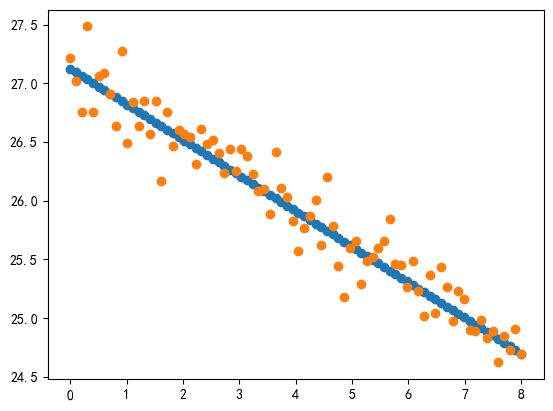

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x_data, y)
plt.scatter(x_data, y_data)

## 计算理想的损失值

In [21]:
# 损失 m_min = 真实值y-预测值y_hat
m_min = np.sum((y-y_data)**2)

In [22]:
m_min

2.989468186778095

## 损失函数计算公式

In [23]:
def compute_loss(a, b, x_data, y_data):
    m = np.sum( ( y_data - (x_data*a + b))**2 ) 
    return m

##### 在网格中的所有 $a,b$ 条件下的损失值

In [24]:
one_dim = zip(np.ravel(a_grid), np.ravel(b_grid))
losses = np.array([compute_loss(a, b, x_data, y_data) for a, b in one_dim])  
losses = losses.reshape(a_grid.shape)

In [25]:
losses

array([[1612386.34138976, 1592583.64214808, 1572921.1300999 , ...,
         344236.08790664,  338031.54643496,  331967.19215679],
       [1567451.68834531, 1547910.18694058, 1528508.87272936, ...,
         324637.62504686,  318694.28141214,  312891.12497092],
       [1523170.02989324, 1503889.72632547, 1484749.6099512 , ...,
         305692.15677947,  300010.0109817 ,  294468.05237744],
       ...,
       [ 294067.81823881,  299601.3091818 ,  305274.98731829, ...,
        1483528.01266916, 1502659.66138216, 1521931.49728866],
       [ 312473.64065604,  318268.32943599,  324203.20540944, ...,
        1527270.02527107, 1546662.87182102, 1566195.90556448],
       [ 331532.45766566,  337588.34428257,  343784.41809297, ...,
        1571665.03246537, 1591319.07685228, 1611113.30843269]])

## 损失函数可视化

Text(0.5, 0.92, '3D Loss Function Surface')

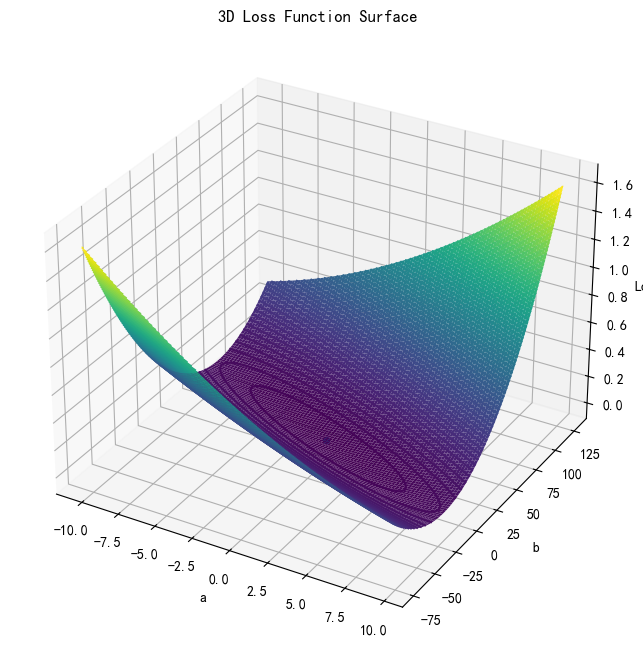

In [26]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))  
ax = fig.add_subplot(111, projection='3d')  
  
# 绘制损失函数的3D曲面  
ax.plot_surface(a_grid, b_grid, losses, cmap='viridis', rstride=1, cstride=1, edgecolor='none')  
ax.contour(a_grid, b_grid, losses, 100, cmap='viridis')  
ax.scatter(a, b, m_min)

# 设置坐标轴标签  
ax.set_xlabel('a')  
ax.set_ylabel('b')  
ax.set_zlabel('Loss')  
# 设置标题  
ax.set_title('3D Loss Function Surface')  

# 岭回归

&emsp;&emsp;多元线性回归模型：其重要假定之一不同样本之间的属性标记值之间不存在线性关系。即 $𝑨^𝑇𝑨$ 是可逆矩阵。  

&emsp;&emsp;多重共线现象：是指自变量之间存在某种相关或者高度相关的关系，其中某个自变量可以被其他自变量组成的线性组合来解释。  

&emsp;&emsp;岭回归：为了解决多重共线现象带来的问题，对线性回归参数的求解方法进行改进。  

&emsp;&emsp;基本思想：在线性回归模型损失函数上增加一个针对 $W$ 的范数惩罚函数，通过对目标函数做正则化处理，将参数向量 $W$ 中所有参数的取值压缩到一个相对较小的范围，即要求 $W$ 中所有参数的取值不能过大。

#### 线性回归损失函数：
$$
M(W)  = (Y-XW)^T (Y-XW)
$$

#### 约束条件

$$
\sum_{i=1}^{m} \omega_i^2 = c
$$

> 此时该问题转化为在等式约束条件下求解函数极值问题；  
> 具体内容，请参考"高等数学-条件极值与拉格朗日乘数法"一文

$$
\begin{aligned}
M(W) & = (Y-XW)^T (Y-XW) \\
& = [Y^T-(XW)^T](Y-XW) \\
& = (Y^T - W^TX^T)(Y-XW) \\
& = Y^TY - Y^TXW - W^TX^TY+W^TX^TXW
\end{aligned}
$$

#### 约束条件

$$
\sum_{i=1}^{m} \omega_i^2 = c
$$

$$
W^TW - c = 0
$$

## 构造拉格朗日函数

$$
\begin{aligned}
M(W) & = (Y-XW)^T (Y-XW) + \lambda(W^TW-c) \\
& = [Y^T-(XW)^T](Y-XW) + \lambda(W^TW-c) \\
& = (Y^T - W^TX^T)(Y-XW) + \lambda(W^TW-c) \\
& = Y^TY - Y^TXW - W^TX^TY+W^TX^TXW + \lambda(W^TW-c) \\
& = Y^TY - Y^TXW - W^TX^TY+W^TX^TXW + \lambda W^TW-\lambda c
\end{aligned}
$$

$\frac{\partial{W^TW}}{\partial{W}}$：
$$
W^T=
\begin{bmatrix}  
w_{1} & w_{2} \\    
\end{bmatrix}  
,
W=
\begin{bmatrix}  
w_{1}  \\  
w_{2}  \\  
\end{bmatrix} 
$$

$$
W^TW=
\begin{bmatrix}  
w_{1}^2 +  w_{2}^2 \\    
\end{bmatrix}   \\
$$

$$
\begin{aligned}
\frac{\partial{W^TW}}{\partial{W}}  &=  
2\begin{bmatrix}  
w_{1} \\
w_{2} \\    
\end{bmatrix}   \\
&=2W
\end{aligned}
$$

$$
\begin{aligned}
M(W) & = Y^TY-2Y^TXW+W^TX^TXW + \lambda W^TW-\lambda c   \\
\frac{\partial{M}}{\partial{w}}  &= 0 - (2Y^TX)^T + 2X^TXW  + 2\lambda W= 0 \\
  X^TY + X^TXW +\lambda W &=0 \\
  (X^TX + \lambda I )W & = X^TY \\
 W & = (X^TX+ \lambda I)^{-1} X^TY
\end{aligned}
$$